In [24]:
%%capture

# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Important header information
naluhelperdir = '../utilities'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
sys.path.insert(1, naluhelperdir)
import stochasticTurbulenceTools as stt
import windspectra

%matplotlib inline

## From the Mann box generator

In [2]:
mann = stt.stochasticTurbulence(prefix="sim09")

In [3]:
mann.readMannBox("./", T=256.0)

Opening file ./sim09_u.bin...
Opening file ./sim09_v.bin...
Opening file ./sim09_w.bin...


In [4]:
print(np.array(mann.u).shape)

(512, 128, 128)


In [5]:
print(mann.length, mann.width, mann.height)

(2560.0, 640.0, 640.0)


In [6]:
print(mann.dX, mann.dT, mann.T)

(5.0, 0.5, 256.0)


In [7]:
# Construct the time record, grids
tvec = mann.dT*np.arange(mann.nX)
xvec = mann.dX*np.arange(mann.nX)
yvec = mann.dY*np.arange(mann.nY)
zvec = mann.dZ*np.arange(mann.nZ)

-0.00662478557428


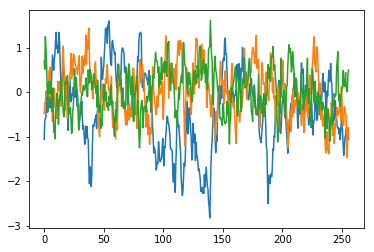

In [23]:
u=np.array(mann.u)
v=np.array(mann.v)
w=np.array(mann.w)
print(np.mean(u))

i,j = 100,100
plt.plot(tvec,u[:,i,j])
plt.plot(tvec,v[:,i,j])
plt.plot(tvec,w[:,i,j])

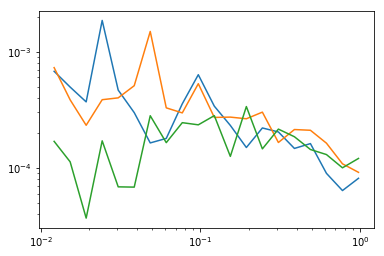

In [22]:
f, Suu = windspectra.getWindSpectra(tvec, u[:,0,0])
f, Svv = windspectra.getWindSpectra(tvec, v[:,0,0])
f, Sww = windspectra.getWindSpectra(tvec, w[:,0,0])

Nband=3
avgf, avgSuu = windspectra.NarrowToOctaveBand(f, Suu, Nband)
avgf, avgSvv = windspectra.NarrowToOctaveBand(f, Svv, Nband)
avgf, avgSww = windspectra.NarrowToOctaveBand(f, Sww, Nband)

plt.loglog(avgf, avgf*avgSuu/100)
plt.loglog(avgf, avgf*avgSvv/100)
plt.loglog(avgf, avgf*avgSww/100)

## After `boxturb` utility

In [82]:
filename='turbulence.nc'
ncbox={}
with Dataset(filename) as d:
    #print(d.variables)
    ncbox['ndim'] = d.dimensions['ndim'].size
    ncbox['nx']   = d.dimensions['nx'].size
    ncbox['ny']   = d.dimensions['ny'].size
    ncbox['nz']   = d.dimensions['nz'].size
    ncbox['L']    = d.variables['box_lengths'][:]
    ncbox['dx']   = d.variables['dx'][:]
    ncbox['uvel'] = d.variables['uvel'][:,:,:]
    ncbox['vvel'] = d.variables['vvel'][:,:,:]
    ncbox['wvel'] = d.variables['wvel'][:,:,:]


0.212450386405


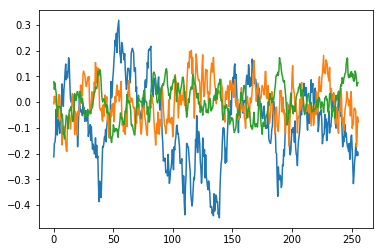

In [100]:
ds=5.0
eps=2.5 #2*ds
gaussScale = np.sqrt(1.0/(eps*np.sqrt(np.pi)*ds))
print(gaussScale)

i,j = 100,100
plt.plot(tvec, ncbox['uvel'][:,i,j]*gaussScale)
plt.plot(tvec, ncbox['vvel'][:,i,j]*gaussScale)
plt.plot(tvec, ncbox['wvel'][:,i,j]*gaussScale)

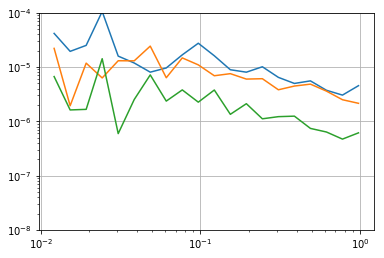

In [81]:
f, Suu = windspectra.getWindSpectra(tvec, ncbox['uvel'][:,0,0]*gaussScale)
f, Svv = windspectra.getWindSpectra(tvec, ncbox['vvel'][:,0,0]*gaussScale)
f, Sww = windspectra.getWindSpectra(tvec, ncbox['wvel'][:,0,0]*gaussScale)

Nband=3
avgf, avgSuu2 = windspectra.NarrowToOctaveBand(f, Suu, Nband)
avgf, avgSvv2 = windspectra.NarrowToOctaveBand(f, Svv, Nband)
avgf, avgSww2 = windspectra.NarrowToOctaveBand(f, Sww, Nband)

plt.loglog(avgf, avgf*avgSuu2/100)
plt.loglog(avgf, avgf*avgSvv2/100)
plt.loglog(avgf, avgf*avgSww2/100)
plt.grid()
plt.ylim([1E-8, 1E-4]);

In [99]:
Suu = []
Svv = []
Sww = []
itotal = 0
print("Working...")
for i in range(ncbox['ny']):
    sys.stdout.write("\r%d%%" % int(i*100.0/ncbox['ny']))
    sys.stdout.flush()
    for j in range(ncbox['nz']):
        f, tSuu = windspectra.getWindSpectra(tvec, ncbox['uvel'][:,i,j]*gaussScale)
        f, tSvv = windspectra.getWindSpectra(tvec, ncbox['vvel'][:,i,j]*gaussScale)
        f, tSww = windspectra.getWindSpectra(tvec, ncbox['wvel'][:,i,j]*gaussScale)
        Suu = tSuu if len(Suu) == 0 else Suu + tSuu
        Svv = tSuu if len(Svv) == 0 else Svv + tSvv
        Sww = tSuu if len(Sww) == 0 else Sww + tSww
        itotal += 1
Suu = Suu/float(itotal)
Svv = Svv/float(itotal)
Sww = Sww/float(itotal)
print("")
print("Done.")

Working...
99%
Done.


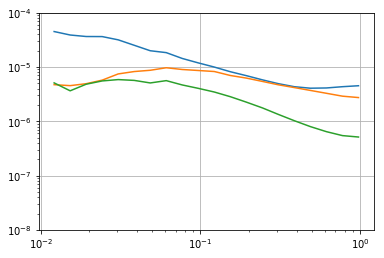

In [97]:
Nband=3
avgf, avgSuu2 = windspectra.NarrowToOctaveBand(f, Suu, Nband)
avgf, avgSvv2 = windspectra.NarrowToOctaveBand(f, Svv, Nband)
avgf, avgSww2 = windspectra.NarrowToOctaveBand(f, Sww, Nband)

plt.loglog(avgf, avgf*avgSuu2/100)
plt.loglog(avgf, avgf*avgSvv2/100)
plt.loglog(avgf, avgf*avgSww2/100)

#plt.loglog(f, f*Suu/100)
#plt.loglog(f, f*Svv/100)
#plt.loglog(f, f*Sww/100)
plt.grid()
plt.ylim([1E-8, 1E-4]);